In [43]:
# Debugging to identify skipped lines
texts = []
backs = []
aspects = []
sentiments = []

with open("Dataset/CourseEvaluation-EN.txt", "r", encoding='utf-8') as file:
    for line in file:
        splited = line.split('')
        texts.append(splited[0])
        backs.append(splited[1])

for line in backs:
    line = line.strip()
    if 'The sentiment polarity of ' in line:
        parts = line.split(' is ')
        if len(parts) == 2:  # Ensure the line splits into exactly 2 parts
            aspect = parts[0].replace('The sentiment polarity of ', '').strip()
            sentiment = parts[1].replace('.', '').strip()
            aspects.append(aspect)
            sentiments.append(sentiment)
        else:
            print(f"Malformed line (ignored): {line}")
    else:
        print(f"Skipped line (no match): {line}")


In [44]:
my_dict_aspects = {i:aspects.count(i) for i in aspects}
print(my_dict_aspects)

{'content quality': 202, 'motivation': 204, 'organization': 200, 'instructor': 200}


In [45]:
my_dict_sentiments = {i:sentiments.count(i) for i in sentiments}
print(my_dict_sentiments)

{'neutral': 570, 'negative': 163, 'positive': 73}


In [47]:
from collections import defaultdict

# Create a dictionary to store sentiment counts for each aspect
aspect_sentiment_counts = defaultdict(lambda: defaultdict(int))

# Populate the dictionary
for aspect, sentiment in zip(aspects, sentiments):
    aspect_sentiment_counts[aspect][sentiment] += 1

# Display the results
for aspect, sentiment_counts in aspect_sentiment_counts.items():
    print(f"Aspect: {aspect}")
    for sentiment, count in sentiment_counts.items():
        print(f"  {sentiment}: {count}")


Aspect: content quality
  neutral: 175
  negative: 23
  positive: 4
Aspect: motivation
  neutral: 177
  negative: 13
  positive: 14
Aspect: organization
  neutral: 106
  negative: 85
  positive: 9
Aspect: instructor
  positive: 46
  neutral: 112
  negative: 42


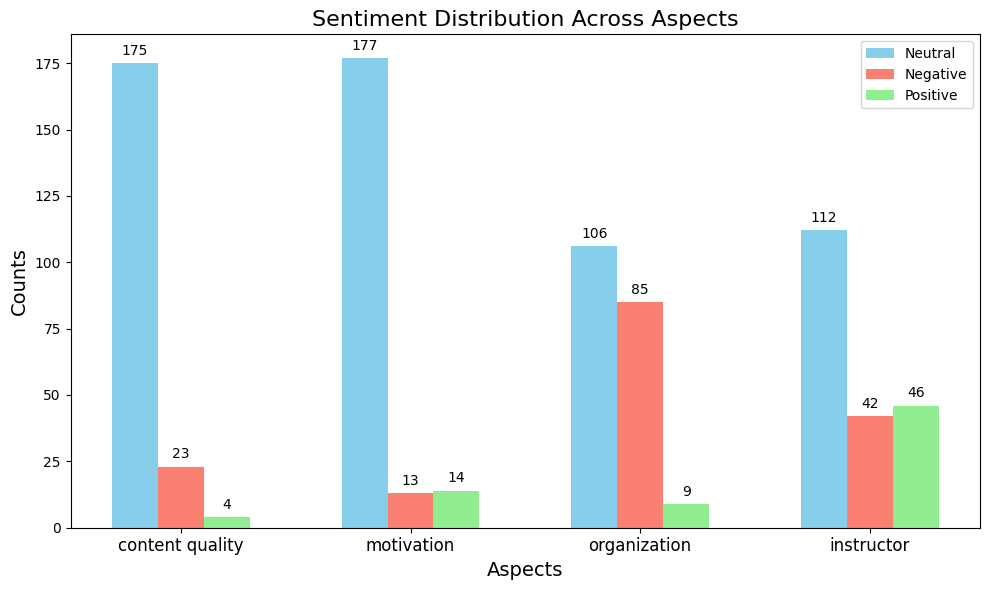

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Data
aspects = ['content quality', 'motivation', 'organization', 'instructor']
neutral_counts = [175, 177, 106, 112]
negative_counts = [23, 13, 85, 42]
positive_counts = [4, 14, 9, 46]

# Plot settings
x = np.arange(len(aspects))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Bars
bar1 = ax.bar(x - width, neutral_counts, width, label='Neutral', color='skyblue')
bar2 = ax.bar(x, negative_counts, width, label='Negative', color='salmon')
bar3 = ax.bar(x + width, positive_counts, width, label='Positive', color='lightgreen')

# Labels, title, and legend
ax.set_xlabel('Aspects', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_title('Sentiment Distribution Across Aspects', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(aspects, fontsize=12)
ax.legend()

# Adding count labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 2, str(height),
                ha='center', va='bottom', fontsize=10)

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

plt.tight_layout()
plt.show()
